# Zadanie 2

In [1]:
library(glue)
library(dplyr)
library(readr)
library(ggthemes)
library(tidyr)
library(hrbrthemes)
library(viridis)
library(ggplot2)
library(ggpubr)

Warning message:
"pakiet 'glue' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'dplyr' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"pakiet 'readr' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'ggthemes' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'tidyr' został zbudowany w wersji R 4.2.2"
Warning message:
"pakiet 'hrbrthemes' został zbudowany w wersji R 4.2.2"
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Warning message:
"pakiet 'viridis' został zbudowany w wersji R 4.2.2"
Ładowanie wymaganego pakietu: viridisLite

Warning mes

In [2]:
inflation_data <- read.csv("data/EU_Inflation_HICP_data_mod.csv", header = TRUE, sep = ",")
deposits_data <- read.csv("data/EU_deposits_1yr_data_mod.csv", header = TRUE, sep = ",")

In [3]:
head(inflation_data)

,Period,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,EU..changing.composition.,Germany,Denmark,Estonia,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/10/2022,11.5,13.1,NA,8.6,NA,NA,11.6,NA,22.4,⋯,8.8,21.8,7.5,16.8,NA,10.6,NA,NA,10.3,14.5
2,01/09/2022,10.9,12.1,15.6,9.0,17.8,10.9,10.9,11.1,24.1,⋯,8.8,22.0,7.4,17.1,15.7,9.8,13.4,10.3,10.6,13.6
3,01/08/2022,9.3,10.5,15.0,9.6,17.1,10.1,8.8,9.9,25.2,⋯,8.6,21.4,7.0,13.7,14.8,9.3,13.3,9.5,11.5,13.4
4,01/07/2022,9.4,10.4,14.9,10.6,17.3,9.8,8.5,9.6,23.2,⋯,9.3,21.3,6.8,11.6,14.2,9.4,13.0,8.3,11.7,12.8
5,01/06/2022,8.7,10.5,14.8,9.0,16.6,9.6,8.2,9.1,22.0,⋯,10.3,19.2,6.1,9.9,14.2,9.0,13.0,8.9,10.8,12.6
6,01/05/2022,7.7,9.9,13.4,8.8,15.2,8.8,8.7,8.2,20.1,⋯,9.1,16.8,5.8,10.2,12.8,8.1,12.4,7.5,8.7,11.8


In [4]:
head(deposits_data)

,Period,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,01/09/2022,0.80,0.84,0.12,0.11,6.10,0.84,1.15,NA,0.94,⋯,,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2,01/08/2022,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
3,01/07/2022,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,,1.59,4.85,0.09,5.49,0.90,0.03,NA,0.21,NA
4,01/06/2022,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,NA,0.49,⋯,,1.47,4.50,0.07,4.37,0.53,0.03,NA,0.16,NA
5,01/05/2022,0.08,0.07,0.04,0.05,4.53,0.14,-0.5,NA,0.50,⋯,,1.23,3.38,0.04,3.21,0.38,0.04,NA,0.21,NA
6,01/04/2022,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,NA,0.44,⋯,,1.15,2.03,0.04,2.56,0.32,0.03,NA,0.24,NA


In [5]:
eurozone_countries_inflation_tidy <- inflation_data |> pivot_longer(-Period, names_to = "country", values_to = "inflation")

In [6]:
eurozone_countries_inflation_tidy

Period,country,inflation
<chr>,<chr>,<dbl>
01/10/2022,Austria,11.5
01/10/2022,Belgium,13.1
01/10/2022,Bulgaria,NA
01/10/2022,Cyprus,8.6
01/10/2022,Czech.Republic,NA
01/10/2022,EU..changing.composition.,NA
01/10/2022,Germany,11.6
01/10/2022,Denmark,NA
01/10/2022,Estonia,22.4


In [7]:
inflation_data$Period <- as.Date(inflation_data$Period, format = "%d/%m/%Y")
deposits_data$Period <- as.Date(deposits_data$Period, format = "%d/%m/%Y")

In [8]:
deposits_data[, 2:34] <- sapply(deposits_data[, 2:34], as.numeric)
# str(deposits_data)

Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"


In [9]:
eurozone_countries_inflation <- select(inflation_data, matches("Period|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
other_countries_inflation <- select(inflation_data, !matches("EU|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
# EU_countries_inflation <- select(inflation_data, matches("Period|EU"))
# Poland_inflation <- select(inflation_data, matches("Period|Poland"))

In [10]:
head(eurozone_countries_inflation)

,Period,Austria,Belgium,Cyprus,Germany,Estonia,Spain,Finland,France,Greece,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Portugal,Slovenia,Slovakia
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-01,11.5,13.1,8.6,11.6,22.4,7.3,8.3,7.1,9.8,9.6,12.8,22.0,8.8,21.8,7.5,16.8,10.6,10.3,14.5
2,2022-09-01,10.9,12.1,9.0,10.9,24.1,9.0,8.4,6.2,12.1,8.6,9.4,22.5,8.8,22.0,7.4,17.1,9.8,10.6,13.6
3,2022-08-01,9.3,10.5,9.6,8.8,25.2,10.5,7.9,6.6,11.2,9.0,9.1,21.1,8.6,21.4,7.0,13.7,9.3,11.5,13.4
4,2022-07-01,9.4,10.4,10.6,8.5,23.2,10.7,8.0,6.8,11.3,9.6,8.4,20.9,9.3,21.3,6.8,11.6,9.4,11.7,12.8
5,2022-06-01,8.7,10.5,9.0,8.2,22.0,10.0,8.1,6.5,11.6,9.6,8.5,20.5,10.3,19.2,6.1,9.9,9.0,10.8,12.6
6,2022-05-01,7.7,9.9,8.8,8.7,20.1,8.5,7.1,5.8,10.5,8.3,7.3,18.5,9.1,16.8,5.8,10.2,8.1,8.7,11.8


In [11]:
eurozone_countries_inflation_avg <- data.frame(eurozone_countries_inflation[1], (rowMeans(eurozone_countries_inflation[2:20], na.rm=TRUE)))
other_countries_inflation_avg <- data.frame(other_countries_inflation[1], (rowMeans(other_countries_inflation[2:9], na.rm=TRUE)))
EU_countries_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("EU")))
Poland_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("Poland")))

In [12]:
inflation_avg <- data.frame(eurozone_countries_inflation[1], eurozone_countries_inflation_avg[2], other_countries_inflation_avg[2], EU_countries_inflation[2], Poland_inflation[2])

colnames(inflation_avg)[1] <- "Period"
colnames(inflation_avg)[2] <- "Eurozone"
colnames(inflation_avg)[3] <- "Other"
colnames(inflation_avg)[4] <- "EU"
colnames(inflation_avg)[5] <- "Poland"

In [13]:
# January 2018 - October 2022
n_months = 58

In [14]:
copy_inf = subset(inflation_data, select=c(Period))[c(2:n_months),]

In [15]:
inflation_from2018 = subset(inflation_data, select=-c(EU..changing.composition.))[c(2:n_months),]
inflation_from2018['average'] = rowMeans(inflation_from2018[2:28], na.rm=TRUE)

In [16]:
deposits_from2018 = subset(deposits_data, select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas))[c(1:(n_months-1)),]
deposits_from2018['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [17]:
inf_cols = colnames(subset(inflation_data, select=-c(Period, EU..changing.composition.)))

In [18]:
dep_cols = colnames(subset(deposits_data[2:34], select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas)))

In [19]:
inf_cols

[1] "Austria"        "Belgium"        "Bulgaria"       "Cyprus"        
 [5] "Czech.Republic" "Germany"        "Denmark"        "Estonia"       
 [9] "Spain"          "Finland"        "France"         "Greece"        
[13] "Croatia"        "Hungary"        "Ireland"        "Italy"         
[17] "Lithuania"      "Luxembourg"     "Latvia"         "Malta"         
[21] "Netherlands"    "Poland"         "Portugal"       "Romania"       
[25] "Sweden"         "Slovenia"       "Slovakia"

In [20]:
dep_cols

[1] "Austria..Euro"                "Belgium..Euro"               
 [3] "Bulgaria..Bulgarian.lev"      "Cyprus..Euro"                
 [5] "Czech.Republic..Czech.koruna" "Germany..Euro"               
 [7] "Denmark..Danish.krone"        "Estonia..Euro"               
 [9] "Spain..Euro"                  "Finland..Euro"               
[11] "France..Euro"                 "Greece..Euro"                
[13] "Croatia..Croatian.kuna"       "Hungary..Hungarian.forint"   
[15] "Ireland..Euro"                "Italy..Euro"                 
[17] "Lithuania..Euro"              "Luxembourg..Euro"            
[19] "Latvia..Euro"                 "Malta..Euro"                 
[21] "Netherlands..Euro"            "Poland..Polish.zloty"        
[23] "Portugal..Euro"               "Romania..Romanian.leu"       
[25] "Sweden..Swedish.krona"        "Slovenia..Euro"              
[27] "Slovakia..Euro"

In [21]:
deposits_to_inflation <- data.frame(copy_inf)
for (i in 1:length(dep_cols)){
    col_inf <- inf_cols[i]
    col_dep <- dep_cols[i]
    new_column = deposits_from2018[col_dep] / ( inflation_from2018[col_inf] + 0.01)
    deposits_to_inflation[col_inf] = new_column
}
names(deposits_to_inflation)[names(deposits_to_inflation) == "copy_inf"] <- "Period"
# deposits_to_inflation[Period] = periods_from2018
deposits_to_inflation['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [22]:
# eurozone
deposits_to_inflation['average_eurozone'] = 
rowMeans(select(deposits_to_inflation, matches(
    "Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia")), na.rm=TRUE)

In [23]:
# and non-eurozone
deposits_to_inflation['average_not_eurozone'] = 
rowMeans(select(deposits_to_inflation, !matches(
    "Period|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia|average|average_eurozone")), na.rm=TRUE)

In [24]:
country1 = 'Poland'
country2 = 'France'
country3 = 'Hungary'
country4 = 'Slovakia'

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


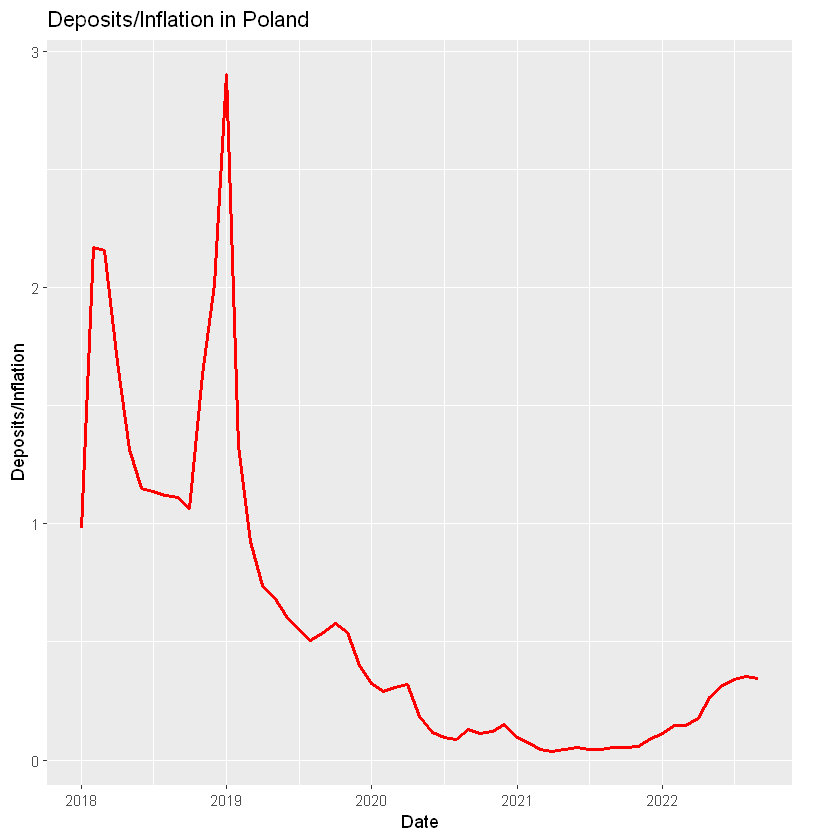

In [25]:
ggplot(data = deposits_to_inflation) +
  geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
  theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
  labs(x = "Date",
       y = "Deposits/Inflation",
       title = "Deposits/Inflation in Poland")

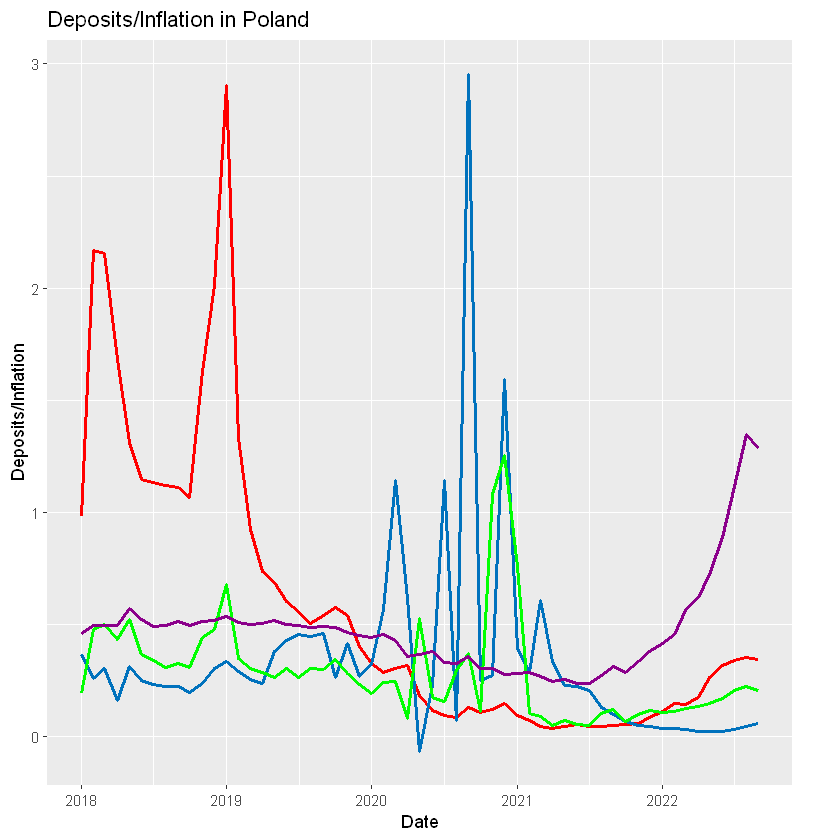

In [26]:
ggplot(data = deposits_to_inflation) +
  geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
geom_line(aes(x = Period, y = average_eurozone), color="#0072BD", size=1) +
geom_line(aes(x = Period, y = average_not_eurozone), color="#00FF00", size=1) +
geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
  theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
  labs(x = "Date",
       y = "Deposits/Inflation",
       title = "Deposits/Inflation in Poland")

In [27]:
plot <- function(dataset, x_axis, y1, y2, y3, y4, y5, y_lab, title) {
  ggplot(data = dataset) +
    geom_line(aes(x = x_axis, y = y1), colour="#FF0000", size=1) +
    geom_line(aes(x = x_axis, y = y2), color="#0072BD", size=1) +
    geom_line(aes(x = x_axis, y = y3), color="#00FF00", size=1) +
    geom_line(aes(x = x_axis, y = y4), color="#000000", size=1) +
    geom_line(aes(x = x_axis, y = y5), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    scale_x_date(date_labels = "%b-%Y") +
    labs(x = "Date",
        y = y_lab, 
        title = title)
}

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


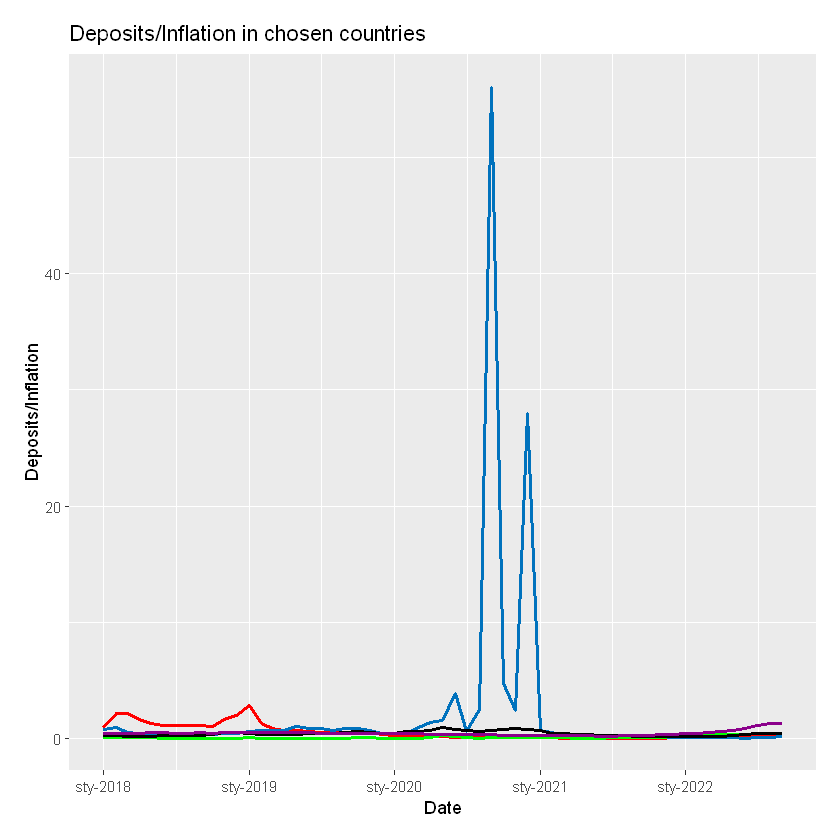

In [28]:
plot(deposits_to_inflation, deposits_to_inflation$Period, deposits_to_inflation$Poland, deposits_to_inflation$France, 
     deposits_to_inflation$Hungary, deposits_to_inflation$Romania, deposits_to_inflation$average, "Deposits/Inflation", "Deposits/Inflation in chosen countries")

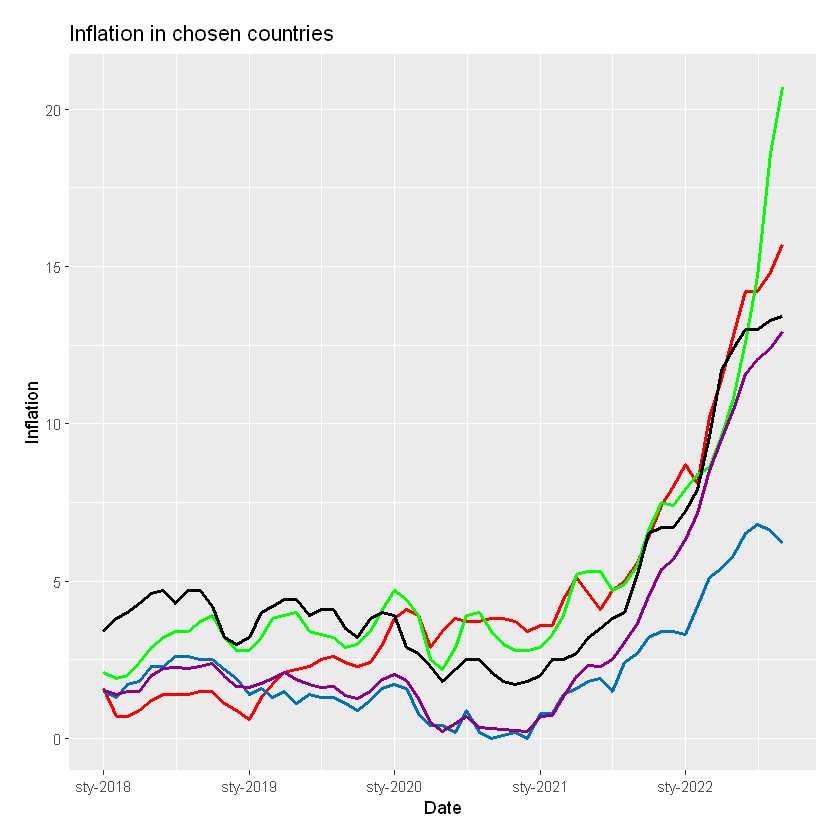

In [29]:
plot(inflation_from2018, inflation_from2018$Period, inflation_from2018$Poland, inflation_from2018$France, 
     inflation_from2018$Hungary, inflation_from2018$Romania, inflation_from2018$average, "Inflation", "Inflation in chosen countries")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


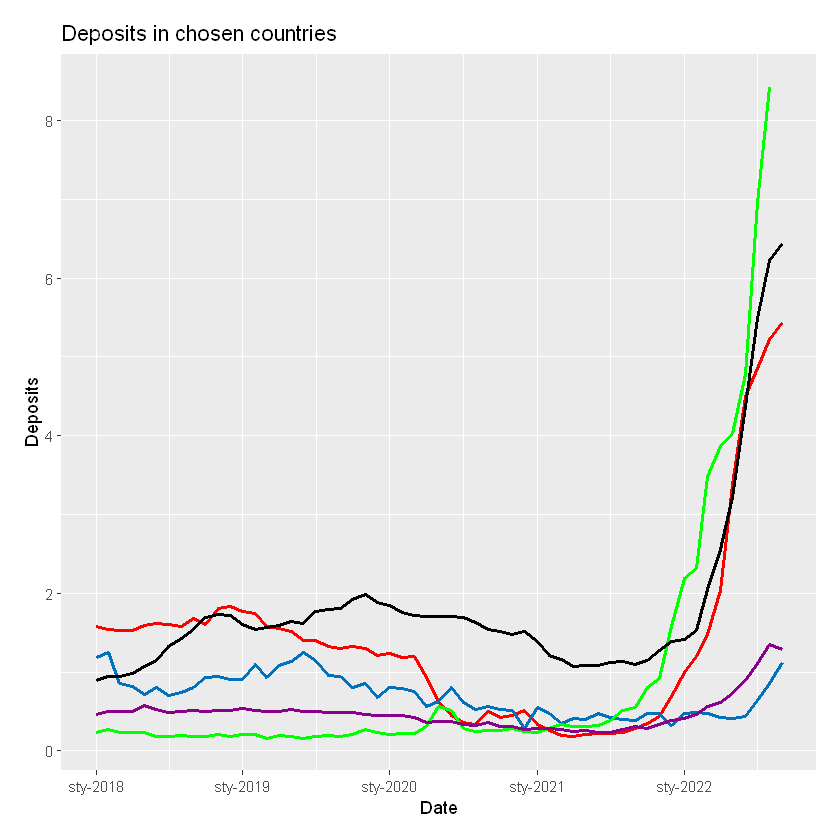

In [30]:
plot(deposits_from2018, deposits_from2018$Period, deposits_from2018$Poland, deposits_from2018$France, 
     deposits_from2018$Hungary, deposits_from2018$Romania, deposits_from2018$average, "Deposits", "Deposits in chosen countries")

In [31]:
# Creating ranges of intervals
before_pandemic <- as.Date("01/01/2018", "%d/%m/%Y")
pandemic <- as.Date("01/03/2020", "%d/%m/%Y")
before_war <- as.Date("01/02/2021", "%d/%m/%Y")
war <- as.Date("01/02/2022", "%d/%m/%Y")
now <- as.Date("01/09/2022", "%d/%m/%Y")

In [32]:
# Split data to intervals
before_pandemic_data <- deposits_to_inflation %>% filter(Period >= before_pandemic & Period < pandemic)
pandemic_data <- deposits_to_inflation %>% filter(Period >= pandemic & Period < before_war)
before_war_data <- deposits_to_inflation %>% filter(Period >= before_war & Period < war)
war_data <- deposits_to_inflation %>% filter(Period >= war & Period <= now)

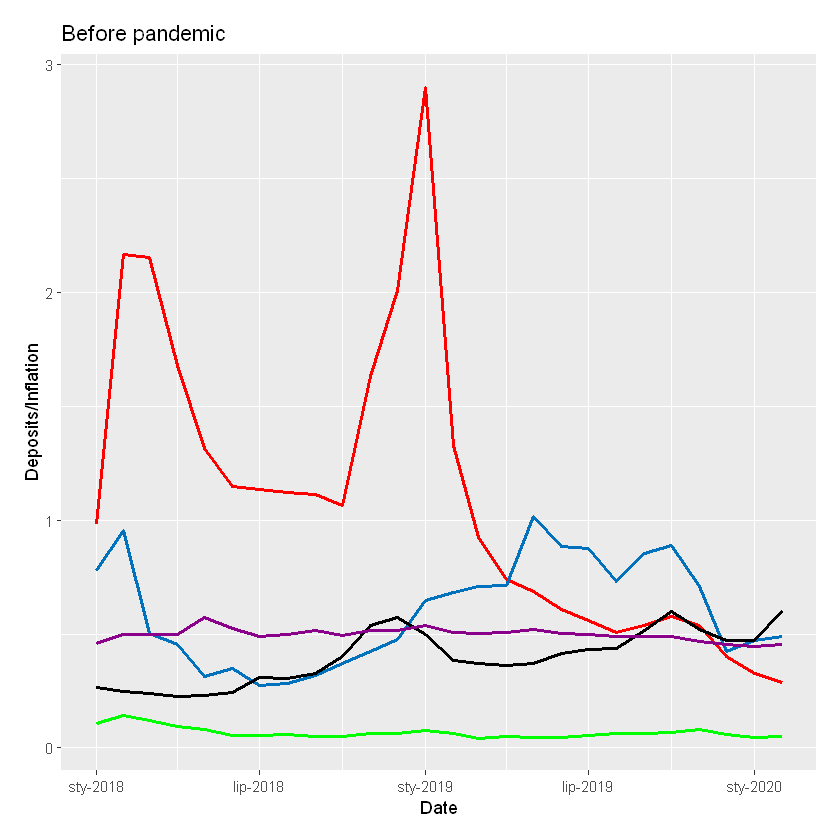

In [33]:
# before pandemic
plot(before_pandemic_data, before_pandemic_data$Period, before_pandemic_data$Poland, before_pandemic_data$France, 
     before_pandemic_data$Hungary, before_pandemic_data$Romania, before_pandemic_data$average, "Deposits/Inflation", "Before pandemic")

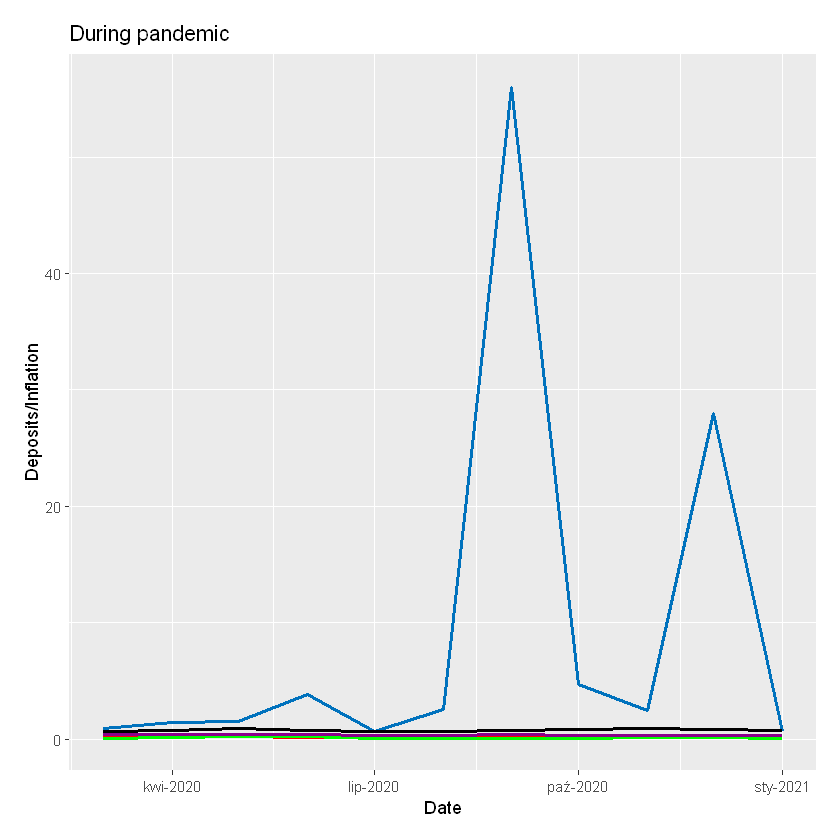

In [34]:
# during pandemic
plot(pandemic_data, pandemic_data$Period, pandemic_data$Poland, pandemic_data$France, 
     pandemic_data$Hungary, pandemic_data$Romania, pandemic_data$average, "Deposits/Inflation", "During pandemic")

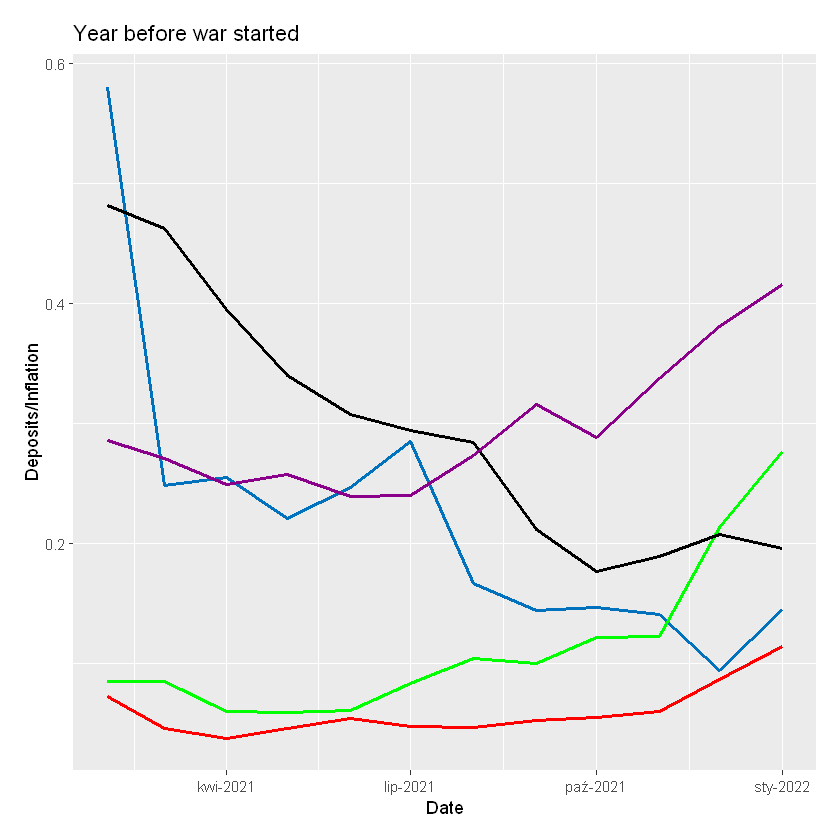

In [35]:
plot(before_war_data, before_war_data$Period, before_war_data$Poland, before_war_data$France, 
     before_war_data$Hungary, before_war_data$Romania, before_war_data$average, "Deposits/Inflation", "Year before war started")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


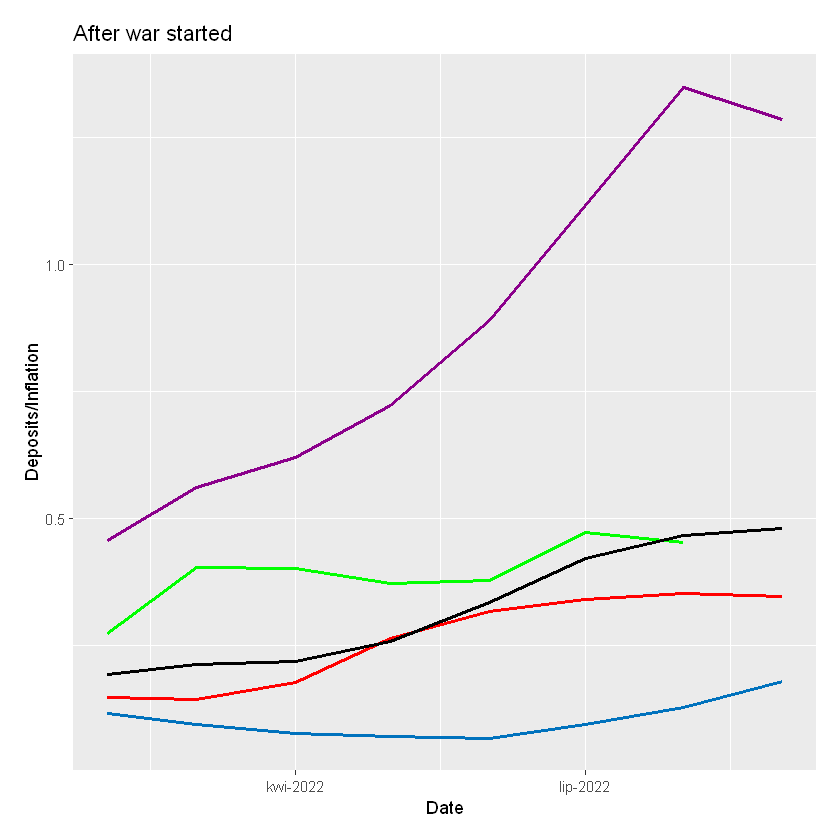

In [36]:
plot(war_data, war_data$Period, war_data$Poland, war_data$France, war_data$Hungary, war_data$Romania, war_data$average, "Deposits/Inflation", "After war started")

# Tidy

In [37]:
deposits_to_inflation_tidy = deposits_to_inflation |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
# sort by countries
deposits_to_inflation_tidy = arrange(deposits_to_inflation_tidy, country, Period)

In [38]:
head(deposits_to_inflation_tidy)

Period,country,coefficient
<date>,<chr>,<dbl>
2018-01-01,Austria,0.12041885
2018-02-01,Austria,0.10994764
2018-03-01,Austria,0.09950249
2018-04-01,Austria,0.10447761
2018-05-01,Austria,0.09478673
2018-06-01,Austria,0.08658009


In [39]:
before_pandemic_data_tidy <- before_pandemic_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
pandemic_data_tidy <- pandemic_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
before_war_data_tidy <- before_war_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")
war_data_tidy <- war_data |> pivot_longer(-Period, names_to = "country", values_to = "coefficient")

In [40]:
options(warn=-1)
# options(warn=0)

In [41]:
plot <- function(data, title, countries) {
  data |>
    ggplot(aes(x=Period, y=coefficient, group=country, color=country)) +
    scale_color_viridis(discrete = TRUE, labels = countries) +
    geom_line(size=1) +
    guides(fill=guide_legend(title=NULL)) +
    xlab("Data") + ylab("Współczynnik") +
    ggtitle(title) +
    theme_ipsum() +
    scale_x_date(date_labels = "%b-%Y") +
    theme(
      legend.title = element_blank(),
      plot.title = element_text(size=18),
      axis.title.x = element_text(size=14),
      axis.title.y = element_text(size=14),
        text=element_text(family="CM Roman", size=21)
    )
}

In [42]:
head(deposits_to_inflation)

,Period,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,Germany,Denmark,Estonia,Spain,⋯,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,average,average_eurozone,average_not_eurozone
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-09-01,0.07332722,0.069364162,0.007687380,0.012208657,0.3425042,0.07699358,0.10351035,0.03898797,0.0177580466,⋯,0.1075395,0.3462763,0.005096840,0.4802386,0.16003880,0.010367578,0.05657605,1.2850000,0.06046098,0.2064305
2,2022-08-01,0.03974221,0.035204567,0.007328448,0.006243496,0.3495032,0.05561862,0.02522704,0.03292344,0.0009514748,⋯,0.1115974,0.3524646,0.007518797,0.4673178,0.12723449,0.003475239,0.03579418,1.3492593,0.04492382,0.2232848
3,2022-07-01,0.02444208,0.010566763,0.006036217,0.004712535,0.3437319,0.03642773,-0.04578564,0.02542008,0.0028011204,⋯,0.1369509,0.3413089,0.009564293,0.4219831,0.10830325,0.002561913,0.01639344,1.1159259,0.03252531,0.2065824
4,2022-06-01,0.01377727,0.013320647,0.004051317,0.005549390,0.3232992,0.02070646,-0.04939627,0.02226261,0.0009990010,⋯,0.1483350,0.3166784,0.007769145,0.3358955,0.05948373,0.002775208,0.01268834,0.8903704,0.02637482,0.1717538
5,2022-05-01,0.01037613,0.007063572,0.002982849,0.005675369,0.2978304,0.01607348,-0.06090134,0.02486325,0.0011750881,⋯,0.1204701,0.2638564,0.004932182,0.2586624,0.05059920,0.004592423,0.01778154,0.7237037,0.02531048,0.1491628
6,2022-04-01,0.01406470,0.006444683,0.003303055,0.005807201,0.3156699,0.01792574,-0.06882591,0.02302459,0.0012033694,⋯,0.1025870,0.1779141,0.005398111,0.2186166,0.04841150,0.004048583,0.02199817,0.6200000,0.02640109,0.1380048


In [43]:
# ggplot(data = deposits_to_inflation) +
#   geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
#   theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
#   labs(x = "Date",
#        y = "Deposits/Inflation",
#        title = "Deposits/Inflation in Poland")

In [62]:
# countries = c( 'average', 'France', 'Hungary', 'Poland', 'Romania')
countries = c( 'average','Hungary', 'Poland', 'Romania')
# countries = c('average', 'Czech.Republic', 'Germany', 'Lithuania', 'Poland', 'Russia', 'Slovakia')

In [63]:
picks_overall_tidy = filter(deposits_to_inflation_tidy, country %in% countries)
picks_before_pandemic_data_tidy = filter(before_pandemic_data_tidy, country %in% countries)
picks_pandemic_data_tidy = filter(pandemic_data_tidy, country %in% countries)
picks_before_war_data_tidy = filter(before_war_data_tidy, country %in% countries)
picks_war_data_tidy = filter(war_data_tidy, country %in% countries)


In [64]:
options(repr.plot.width=12, repr.plot.height=10)

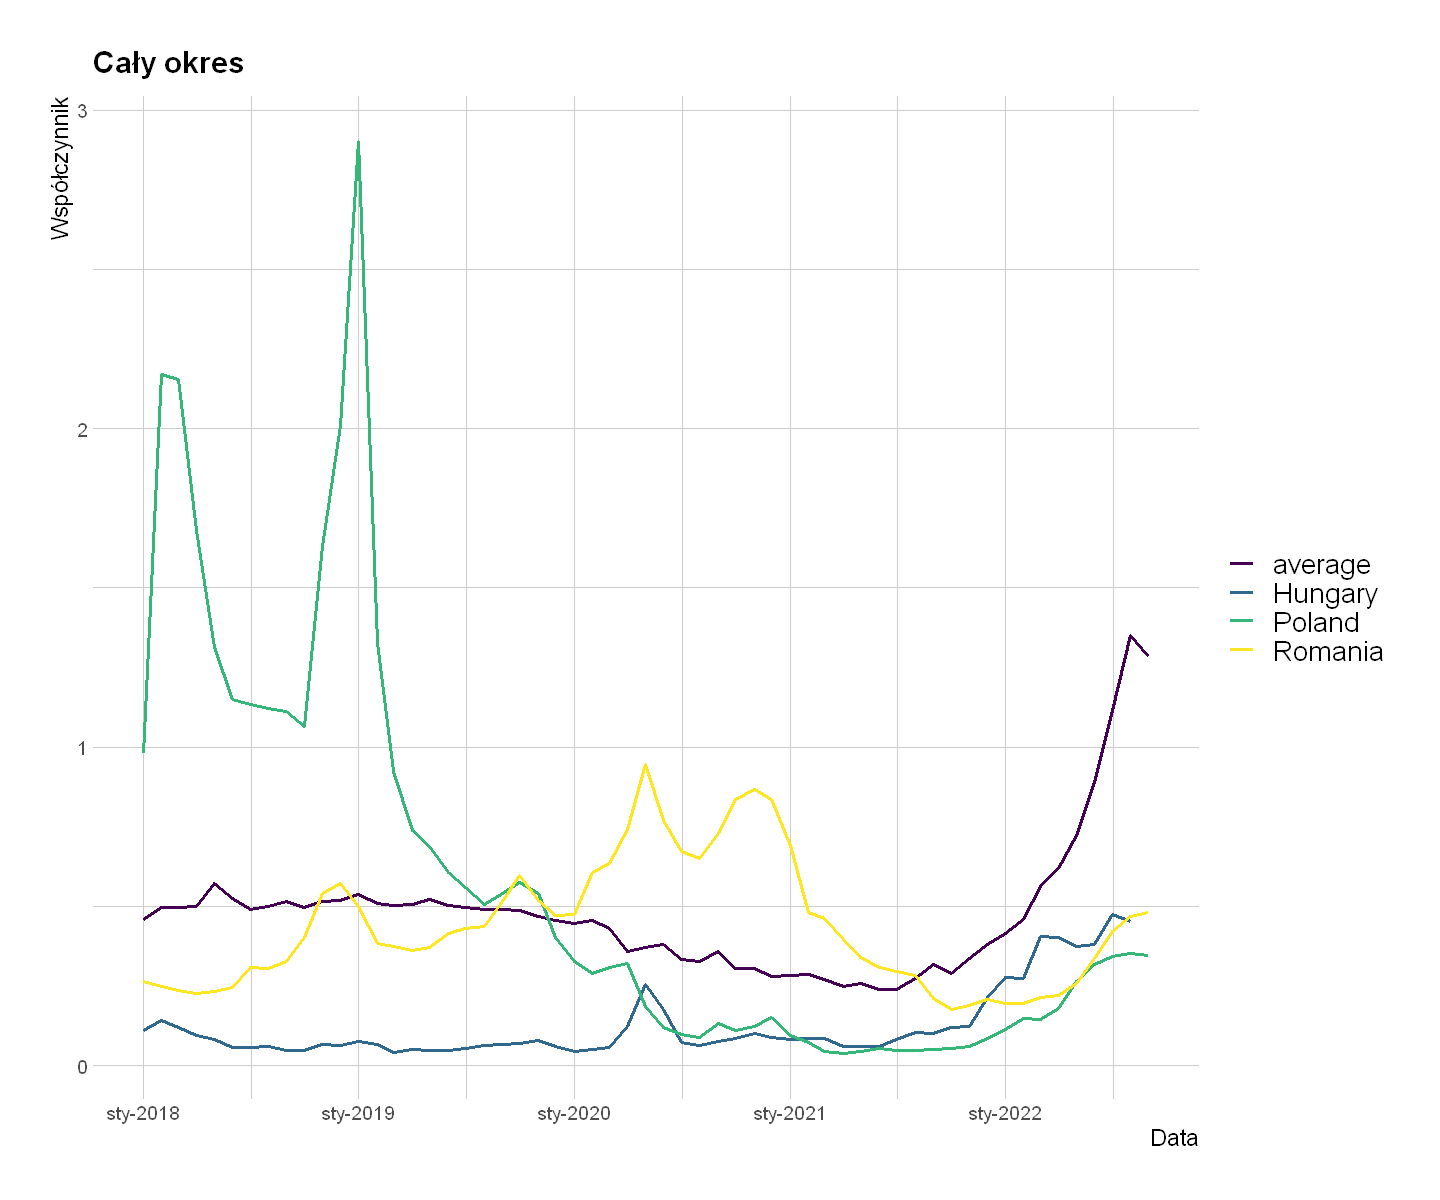

In [65]:
plot(picks_overall_tidy, "Cały okres", countries)

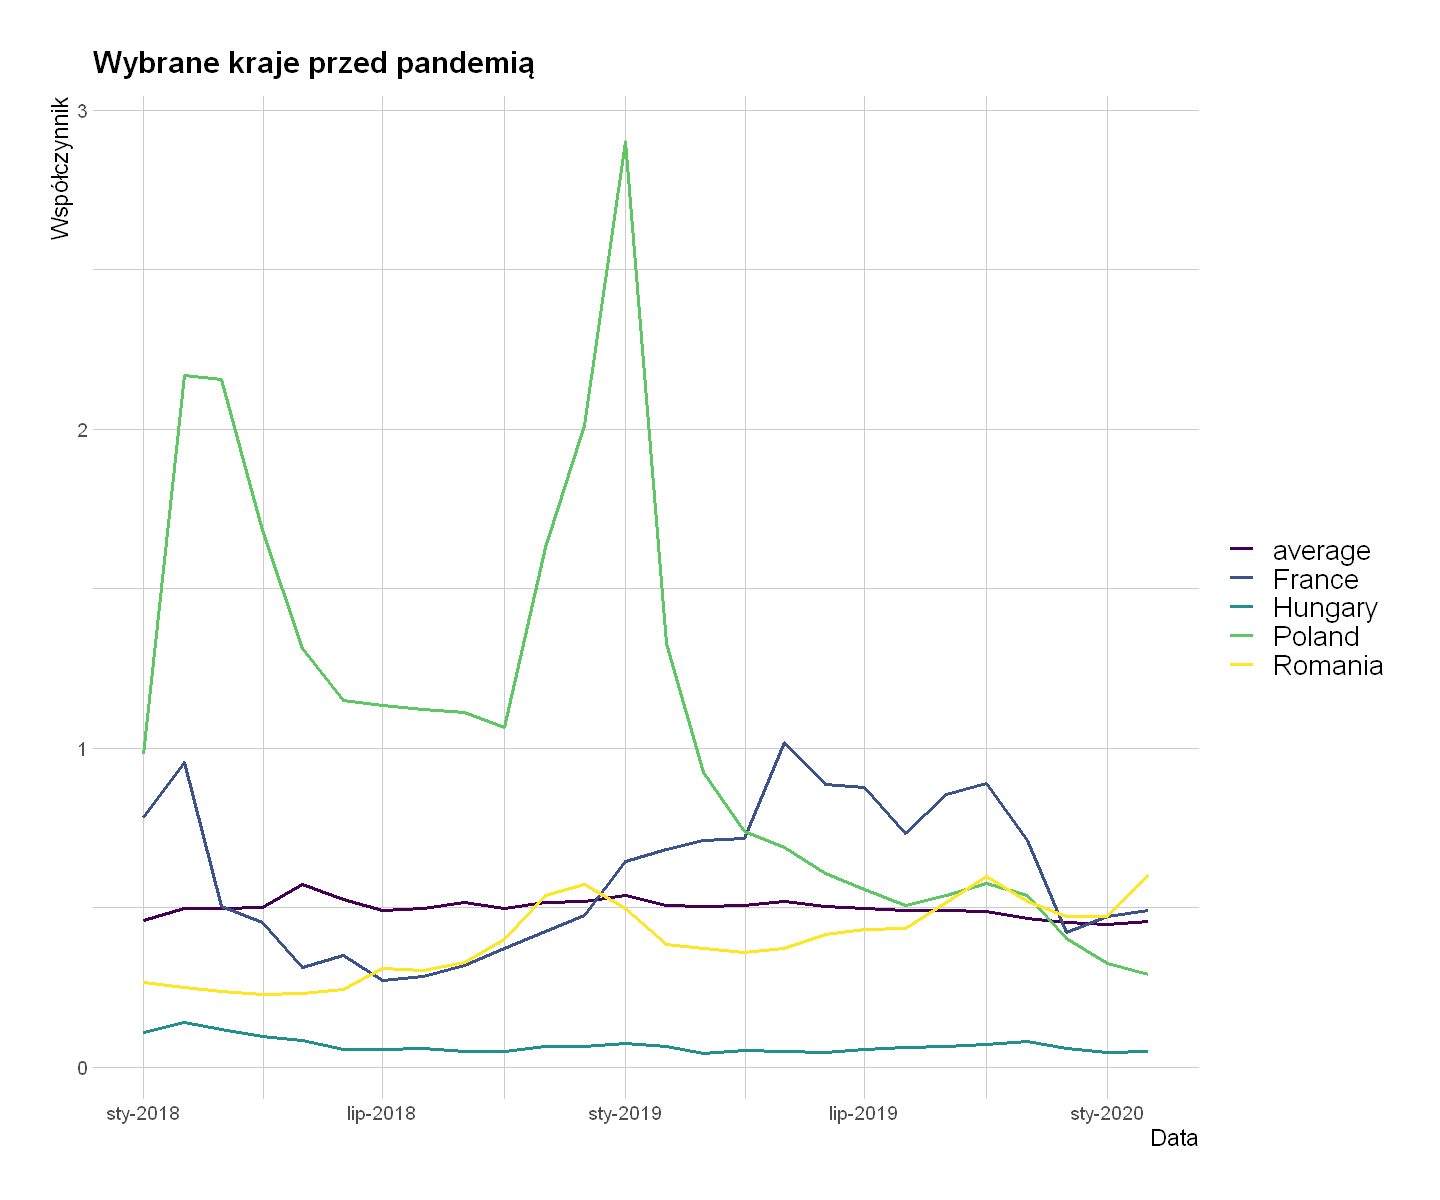

In [48]:
plot(picks_before_pandemic_data_tidy, "Wybrane kraje przed pandemią", countries)

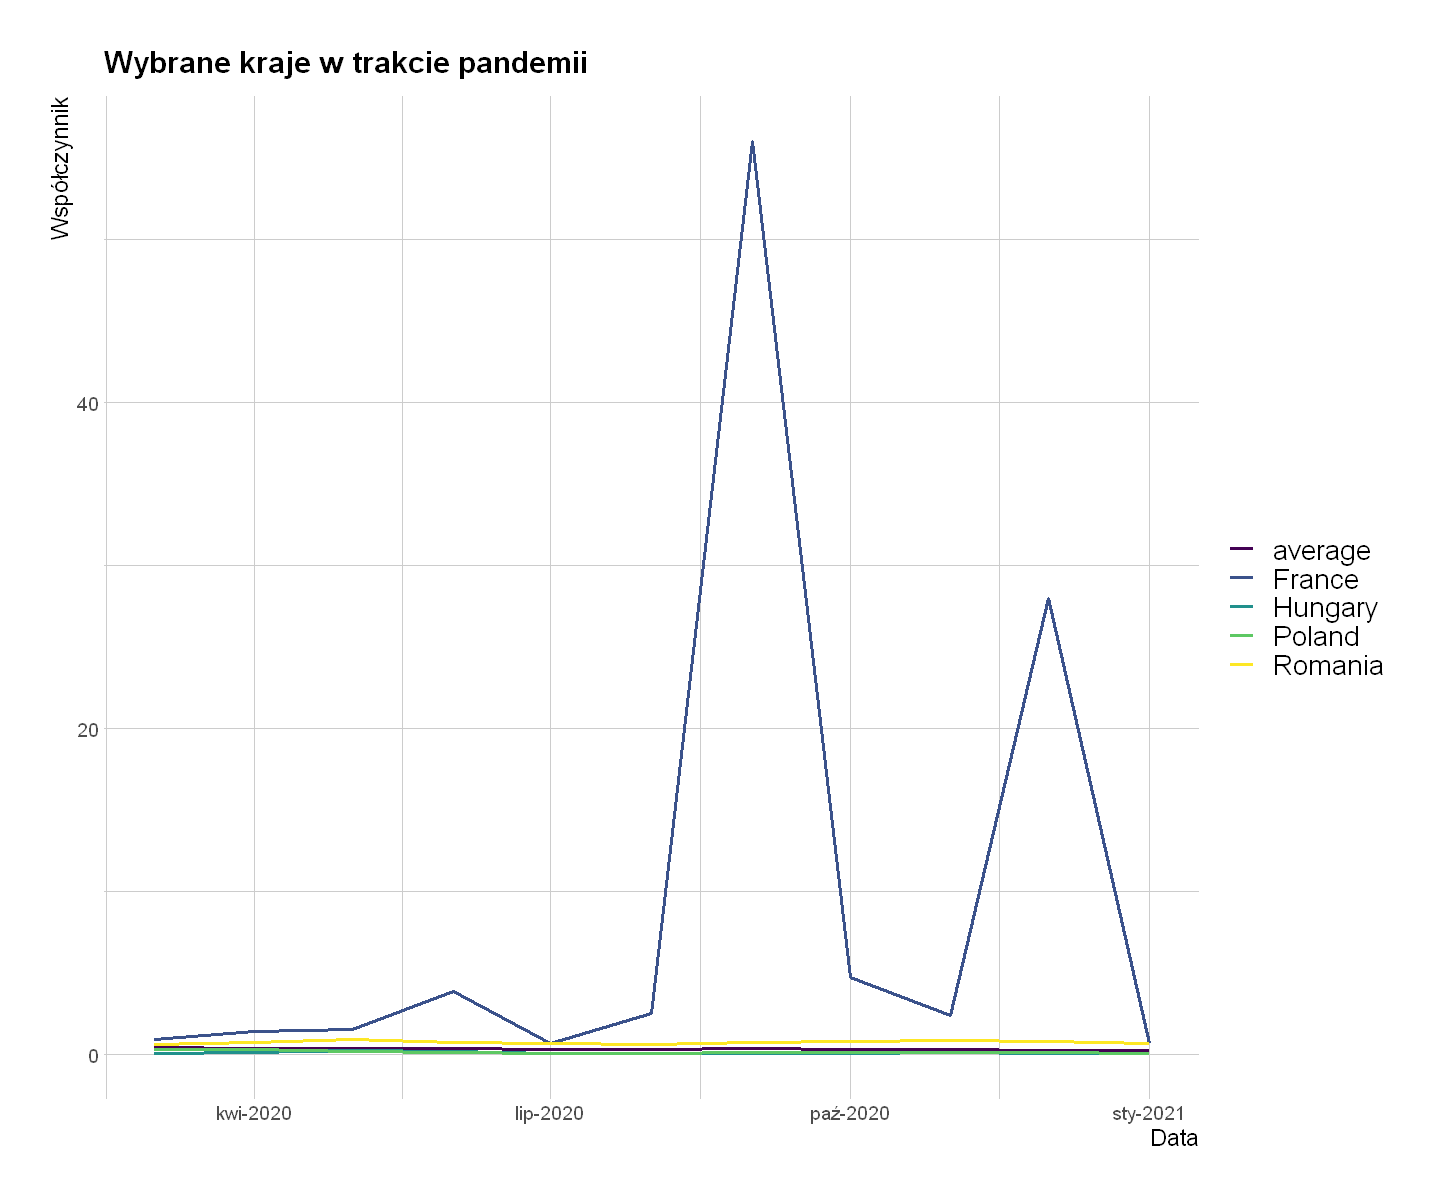

In [49]:
plot(picks_pandemic_data_tidy, "Wybrane kraje w trakcie pandemii", countries)

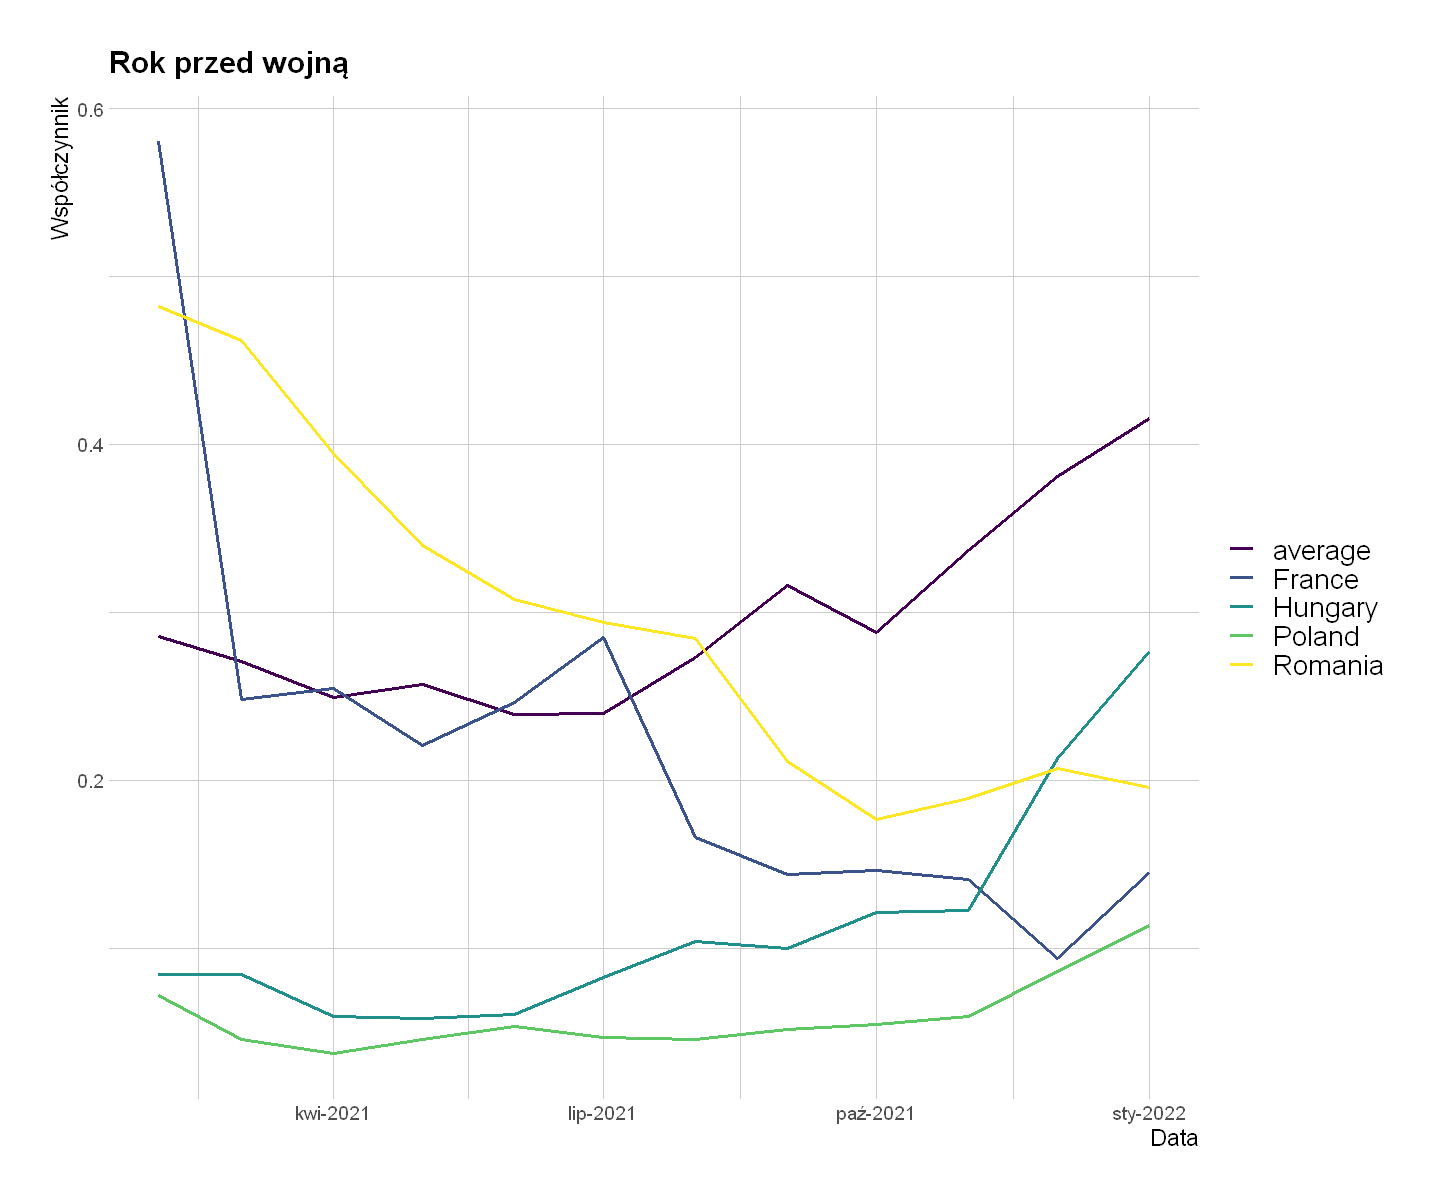

In [50]:
plot(picks_before_war_data_tidy, "Rok przed wojną", countries)

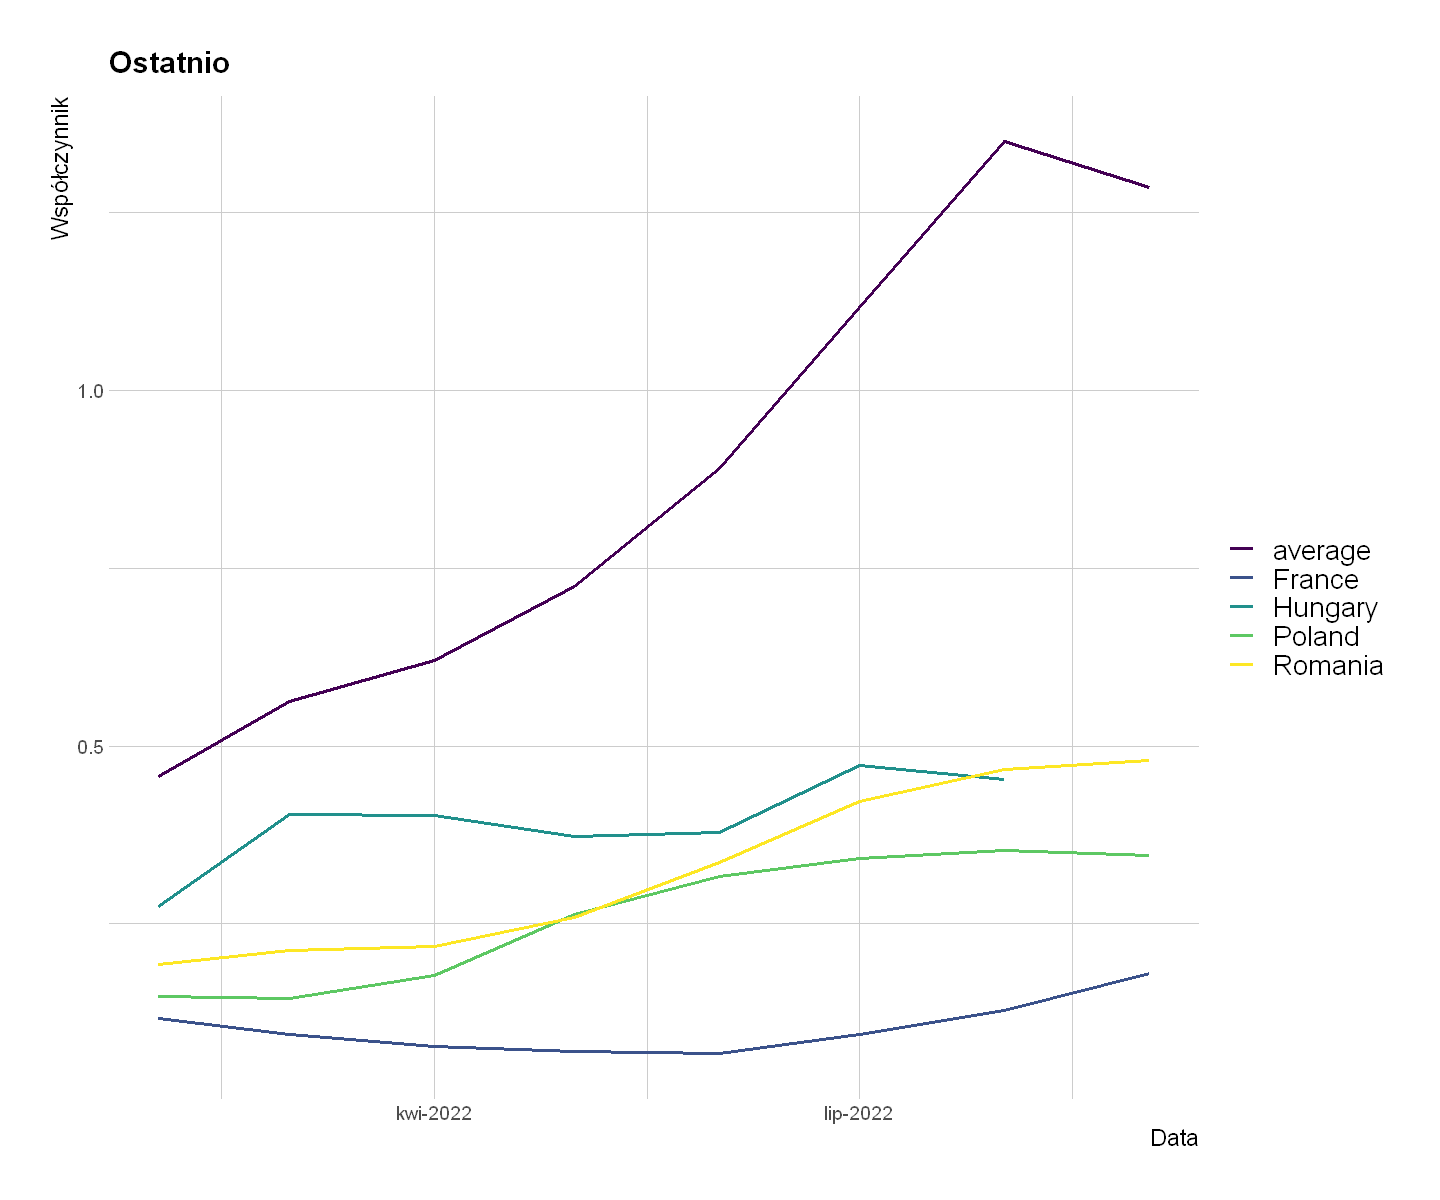

In [51]:
plot(picks_war_data_tidy, "Ostatnio", countries)

In [52]:
picks_war_data_tidy <- picks_war_data_tidy |> filter(country == 'Poland') |> summary()

In [53]:
picks_war_data_tidy

     Period             country           coefficient    
 Min.   :2022-02-01   Length:8           Min.   :0.1450  
 1st Qu.:2022-03-24   Class :character   1st Qu.:0.1704  
 Median :2022-05-16   Mode  :character   Median :0.2903  
 Mean   :2022-05-16                      Mean   :0.2614  
 3rd Qu.:2022-07-08                      3rd Qu.:0.3426  
 Max.   :2022-09-01                      Max.   :0.3525  

In [68]:
for (c in countries){
    print(c)
    print(picks_overall_tidy |> filter(country == c) |> summary())
}

[1] "average"
     Period             country           coefficient    
 Min.   :2022-02-01   Length:8           Min.   :0.4574  
 1st Qu.:2022-03-24   Class :character   1st Qu.:0.6055  
 Median :2022-05-16   Mode  :character   Median :0.8070  
 Mean   :2022-05-16                      Mean   :0.8754  
 3rd Qu.:2022-07-08                      3rd Qu.:1.1582  
 Max.   :2022-09-01                      Max.   :1.3493  
[1] "Hungary"
     Period             country           coefficient    
 Min.   :2022-02-01   Length:8           Min.   :0.2747  
 1st Qu.:2022-03-24   Class :character   1st Qu.:0.3759  
 Median :2022-05-16   Mode  :character   Median :0.4017  
 Mean   :2022-05-16                      Mean   :0.3940  
 3rd Qu.:2022-07-08                      3rd Qu.:0.4283  
 Max.   :2022-09-01                      Max.   :0.4731  
                                         NA's   :1       
[1] "Poland"
     Period             country           coefficient    
 Min.   :2022-02-01   Length:8 

In [69]:
for (c in countries){
    print(c)
    print(picks_before_pandemic_data_tidy |> filter(country == c) |> summary())
}

[1] "average"
     Period             country           coefficient    
 Min.   :2018-01-01   Length:26          Min.   :0.4456  
 1st Qu.:2018-07-08   Class :character   1st Qu.:0.4898  
 Median :2019-01-16   Mode  :character   Median :0.4977  
 Mean   :2019-01-15                      Mean   :0.4981  
 3rd Qu.:2019-07-24                      3rd Qu.:0.5142  
 Max.   :2020-02-01                      Max.   :0.5719  
[1] "Hungary"
     Period             country           coefficient     
 Min.   :2018-01-01   Length:26          Min.   :0.04199  
 1st Qu.:2018-07-08   Class :character   1st Qu.:0.05020  
 Median :2019-01-16   Mode  :character   Median :0.06048  
 Mean   :2019-01-15                      Mean   :0.06754  
 3rd Qu.:2019-07-24                      3rd Qu.:0.07349  
 Max.   :2020-02-01                      Max.   :0.14136  
[1] "Poland"
     Period             country           coefficient    
 Min.   :2018-01-01   Length:26          Min.   :0.2895  
 1st Qu.:2018-07-08   Cl

In [70]:
for (c in countries){
    print(c)
    print(picks_pandemic_data_tidy |> filter(country == c) |> summary())
}

[1] "average"
     Period             country           coefficient    
 Min.   :2020-03-01   Length:11          Min.   :0.2781  
 1st Qu.:2020-05-16   Class :character   1st Qu.:0.3054  
 Median :2020-08-01   Mode  :character   Median :0.3319  
 Mean   :2020-08-01                      Mean   :0.3391  
 3rd Qu.:2020-10-16                      3rd Qu.:0.3644  
 Max.   :2021-01-01                      Max.   :0.4311  
[1] "Hungary"
     Period             country           coefficient     
 Min.   :2020-03-01   Length:11          Min.   :0.05627  
 1st Qu.:2020-05-16   Class :character   1st Qu.:0.07393  
 Median :2020-08-01   Mode  :character   Median :0.08638  
 Mean   :2020-08-01                      Mean   :0.10692  
 3rd Qu.:2020-10-16                      3rd Qu.:0.11158  
 Max.   :2021-01-01                      Max.   :0.25339  
[1] "Poland"
     Period             country           coefficient     
 Min.   :2020-03-01   Length:11          Min.   :0.08895  
 1st Qu.:2020-05-16   

In [71]:
for (c in countries){
    print(c)
    print(picks_before_war_data_tidy |> filter(country == c) |> summary())
}

[1] "average"
     Period             country           coefficient    
 Min.   :2021-02-01   Length:12          Min.   :0.2389  
 1st Qu.:2021-04-23   Class :character   1st Qu.:0.2551  
 Median :2021-07-16   Mode  :character   Median :0.2794  
 Mean   :2021-07-16                      Mean   :0.2960  
 3rd Qu.:2021-10-08                      3rd Qu.:0.3212  
 Max.   :2022-01-01                      Max.   :0.4156  
[1] "Hungary"
     Period             country           coefficient     
 Min.   :2021-02-01   Length:12          Min.   :0.05838  
 1st Qu.:2021-04-23   Class :character   1st Qu.:0.07717  
 Median :2021-07-16   Mode  :character   Median :0.09221  
 Mean   :2021-07-16                      Mean   :0.11394  
 3rd Qu.:2021-10-08                      3rd Qu.:0.12140  
 Max.   :2022-01-01                      Max.   :0.27686  
[1] "Poland"
     Period             country           coefficient     
 Min.   :2021-02-01   Length:12          Min.   :0.03718  
 1st Qu.:2021-04-23   

In [72]:
for (c in countries){
    print(c)
    print(picks_war_data_tidy |> filter(country == c) |> summary())
}

[1] "average"
     Period             country           coefficient    
 Min.   :2022-02-01   Length:8           Min.   :0.4574  
 1st Qu.:2022-03-24   Class :character   1st Qu.:0.6055  
 Median :2022-05-16   Mode  :character   Median :0.8070  
 Mean   :2022-05-16                      Mean   :0.8754  
 3rd Qu.:2022-07-08                      3rd Qu.:1.1582  
 Max.   :2022-09-01                      Max.   :1.3493  
[1] "Hungary"
     Period             country           coefficient    
 Min.   :2022-02-01   Length:8           Min.   :0.2747  
 1st Qu.:2022-03-24   Class :character   1st Qu.:0.3759  
 Median :2022-05-16   Mode  :character   Median :0.4017  
 Mean   :2022-05-16                      Mean   :0.3940  
 3rd Qu.:2022-07-08                      3rd Qu.:0.4283  
 Max.   :2022-09-01                      Max.   :0.4731  
                                         NA's   :1       
[1] "Poland"
     Period             country           coefficient    
 Min.   :2022-02-01   Length:8 